### Import libararies


In [481]:
import numpy as np
import matplotlib.pyplot as plt

### Accuracy Function

In [482]:
np.random.seed(810197494)
def calculate_accuracy(y_true,y_pred):
        acc = np.sum(np.equal(y_true,y_pred))/len(y_true)    
        return acc

### Confusion Matrix

In [483]:
def calculate_confusion(actual, predicted):

    
    classes = np.unique(actual)
    confusion_matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            confusion_matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    
    return confusion_matrix

### Confidence Matrix

In [484]:
def calculate_confidence(actual, predicted):

    
    classes = np.unique(actual)
    confusion_matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            confusion_matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
        
    sum_of_rows = confusion_matrix.sum(axis=1)
    normalized_array = confusion_matrix / sum_of_rows[:, np.newaxis]
    confidence_matrix=normalized_array
    return confidence_matrix

### Ploting Lines and Datas

In [485]:
def plot_classifier(w0,b0,w1,b1,w2,b2): 
   
    x_dimension = np.linspace(4, 10, 10)
    Line1 = (w0[0]*x_dimension + b0)/(-w0[1])
    Line2 = (w1[0]*x_dimension + b1)/(-w1[1])
    Line3 = (w2[0]*x_dimension + b2)/(-w2[1])
    plt.plot(x_dimension,Line1)
    plt.plot(x_dimension,Line2)
    plt.plot(x_dimension,Line3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
w0 = [-1.334025 ,  2.3429935]
b0 = -0.15999999999999867
w1 = [ 0.32916515, -1.10342387]
b1 = 0.8239999999999256
w2 = [-52.98394628 ,-73.14606288]
b2 = 462    
    

### Predict Function

In [486]:
b1_=0.69
def predict(data,w,b):
    predict_vector = []
    for i in range(data.shape[0]):
        if (np.dot(w, data[i,:])-b) > 0:
             predict_vector.append(1)
        else:
            predict_vector.append(-1)
            
        return predict_vector

### Label convertor for One Vs all Algorithm

In [487]:
def label_convertor(label,class_Num):
    new_label = [1 if x==class_Num else -1 for x in label]
    return new_label

### LosGradient for Stochastic gradient descent

In [488]:
def lossGradient(W,x,y,bias,lammbda):
   
    lossGradw = np.zeros_like(W)
    biaslossgrad = 0
    distance = np.max([0, 1 - y * ((W @ x)-bias)])
    if distance == 0:
        lossGradw = 2*lammbda*W
        biaslossgrad =0
    else:
        lossGradw = 2*lammbda*W -  y * x
        biaslossgrad = y
            
    return lossGradw,biaslossgrad

### W & bias corresponed to each Class

In [489]:
def Wfinder(w,X,Class_label,bias,lammbda,steps,Learning_rate):
    for step in range(steps):
        for index ,result in enumerate(X):
            lossgradw_output , lossgradbias_output = lossGradient(w,result,Class_label[index],bias,lammbda)
            w = w - Learning_rate* lossgradw_output
            bias = bias - Learning_rate*lossgradbias_output
            
        return w,bias

# Start testing the program

### Import some data to play with

In [492]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
colors = "bry"

### plot unclassified data

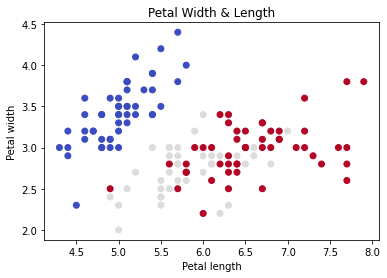

In [493]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width & Length')
plt.show()

In [494]:
label=y
Class1=label_convertor(label,0)
Class2=label_convertor(label,1)
Class3=label_convertor(label,2)

w = np.random.random(X.shape[1])
Learning_rate = 1
lammbda = 1e-4
steps = 1000
bias = 0

W0,bias0=Wfinder(w,X,Class1,bias,lammbda,steps,Learning_rate)
W1,bias1=Wfinder(w,X,Class2,bias,lammbda,steps,Learning_rate)
W2,bias2=Wfinder(w,X,Class3,bias,lammbda,steps,Learning_rate)

print(W0)
print(bias0)
print(W1)
print(bias1)
print(W2)
print(bias2)


[-6.57927707 -2.52282508]
1
[-4.04258084 -2.91335459]
1
[1.57178047 0.48501797]
0


### Ploting Result

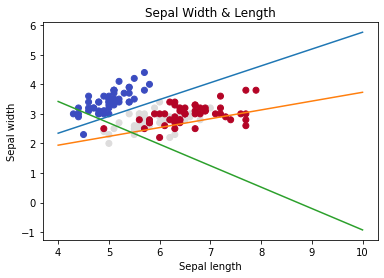

In [495]:
plor_classifier(w0,b0,w1,b1,w2,b2)

## Calculating Confusion & Confidence Matrix & Calculating Accuracy Score

### Class One

In [496]:
Class1_label=predict(X,w0,b0)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)
print(accuracy)
print(confusion_matrix)
print(confidence_matrix)

0.3333333333333333
[[ 0. 50.  0.]
 [ 0. 50.  0.]
 [ 0. 50.  0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Class Two

In [497]:
Class2_label=predict(X,w1,b1)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)
print(accuracy)
print(confusion_matrix)
print(confidence_matrix)


0.3333333333333333
[[ 0. 50.  0.]
 [ 0. 50.  0.]
 [ 0. 50.  0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Class Three

In [498]:
Class3_label=predict(X,w2,b2)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)
print(Class3_label)
print(accuracy)
print(confusion_matrix)
print(confidence_matrix)


[-1]
0.3333333333333333
[[ 0. 50.  0.]
 [ 0. 50.  0.]
 [ 0. 50.  0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## Steepest Descent Using Armijo Rule

In [499]:
def gradient_Armojo(lambdaa, b,w,x_first,y_first):
    gradient_b = 0
    gradient_w = np.zeros(data.shape[1])
    for i in range(x_first.shape[0]):
        x = x_first[i]
        y= y_first[i]
        if (1 - y*(np.dot(w, x) - b)) > 0:
            gradient_b += y
            gradient_w += 2*lambdaa*w - y*x
        else:
            gradient_b += 0
            gradient_w += 2*lambdaa*w

    return gradient_b/x_first.shape[1], gradient_w/x_first.shape[1]

### Steepest Descent gradient Function

In [500]:
def Steepest_descent(lambdaa, train_data, train_labels):
    Mean = 0
    variance = 0.1
    steps = 100
    b = 0
    alpha = 10**-3
    w = np.random.normal(Mean,variance,train_data.shape[1])
    for step in range(steps):
        grad_b , grad_w = gradient_Armojo(lambdaa , b , w , train_data , train_labels)
        w = w - alpha*grad_w
        b = b - alpha*grad_b
    return w,b

### Testing Steepest Descent Using Armijo

In [501]:
data=X
train_data = data
label=y

Class1=label_convertor(label,0)
Class2=label_convertor(label,1)
Class3=label_convertor(label,2)

lam = 1e-2
wo, bo = gradient_descent(lam ,train_data,Class1)
w1, b1 = gradient_descent(lam ,train_data,Class2)
w3, b3 = gradient_descent(lam ,train_data,Class3)

print(wo)
print(b0)
print(w1)
print(b1)
print(w2)
print(b2)

[-0.96159501  1.64324628]
-0.15999999999999867
[ 0.17008052 -0.62637202]
-0.01850000000000001
[-52.98394628, -73.14606288]
462


### Ploting Classifier for Armojo implementation

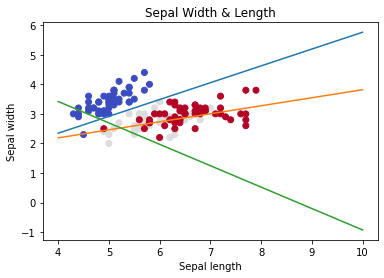

In [502]:
plot_classifier(w0,b0,w1,b1_,w2,b2)

### Calculating Confusion & Confidence Matrix & Calculating Accuracy Score_Steepsest Descent

### Class One

In [505]:
Class1_label=predict(X,w0,b0)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)

### Class Two

In [506]:
Class2_label=predict(X,w1,b1_)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)

### Class Three

In [507]:
Class2_label=predict(X,w2,b2)
accuracy=calculate_accuracy(y,Class1_label)
confusion_matrix=calculate_confusion(y,Class1_label)
confidence_matrix=calculate_confidence(y,Class1_label)